<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/23_HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#https://www.kaggle.com/datasets/shwetabh123/mall-customers
df = pd.read_csv("23-mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

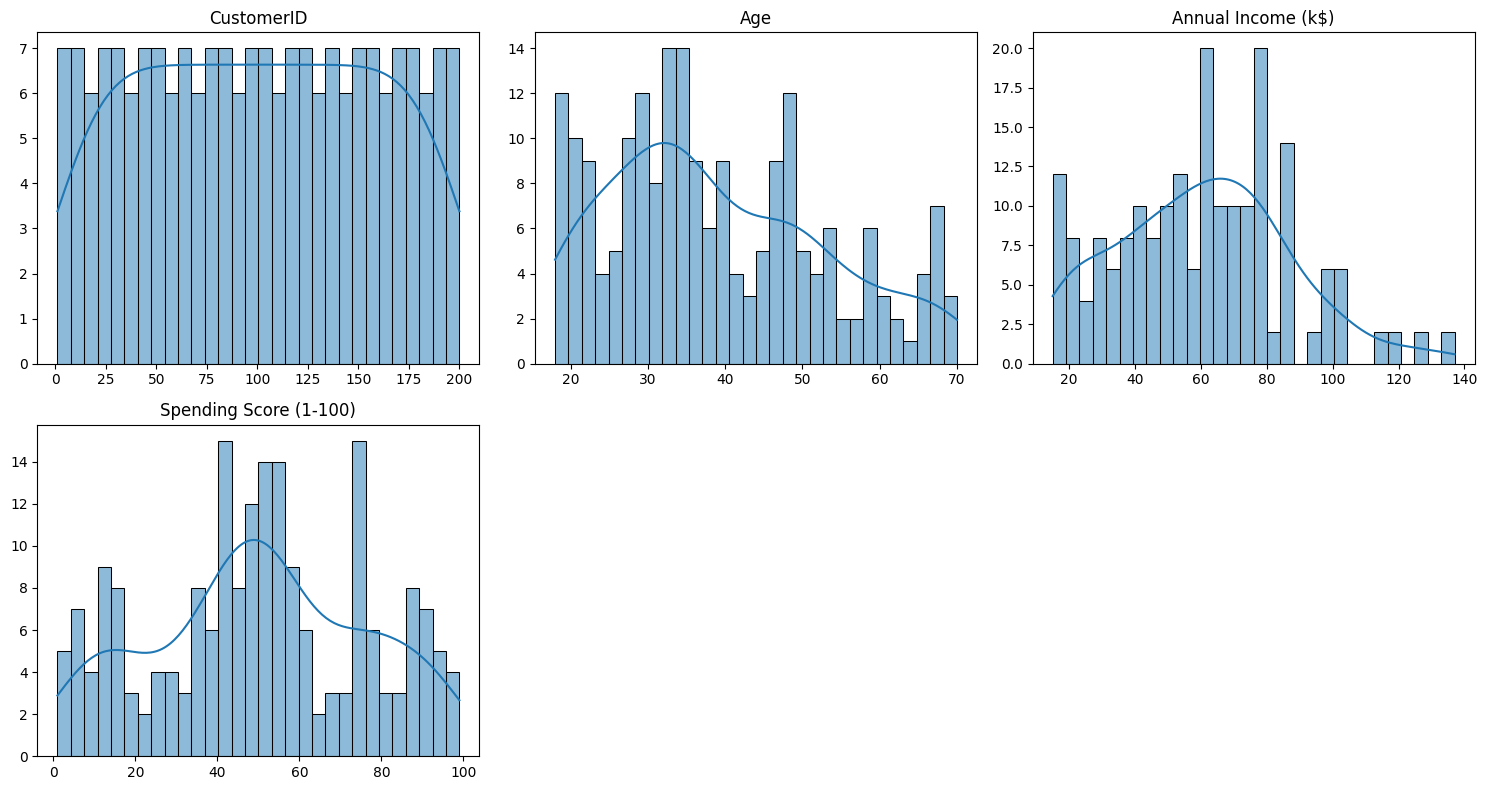

In [5]:
plot_all_histograms(df)

In [6]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [8]:
df = df.drop('CustomerID', axis=1)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


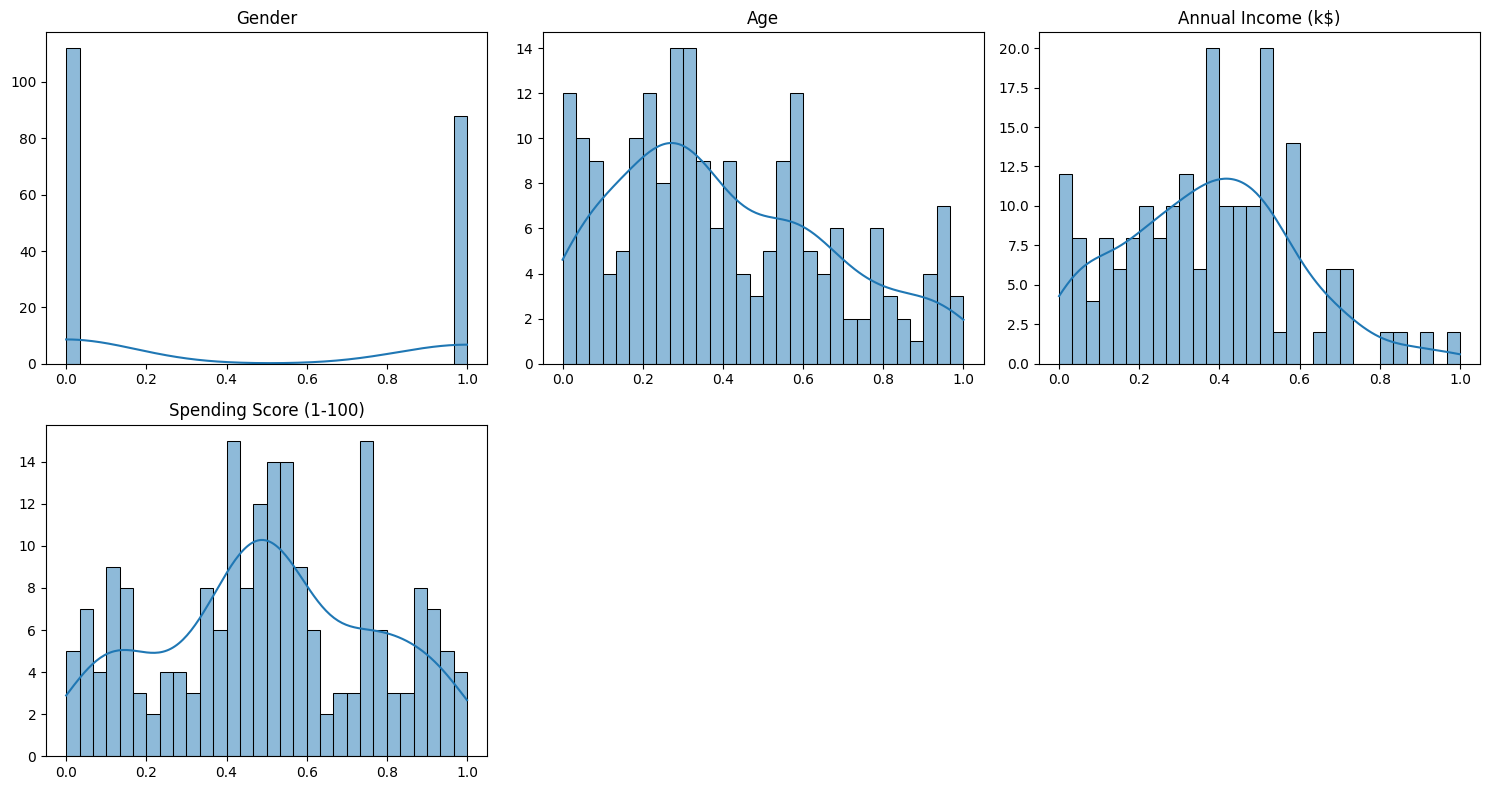

In [11]:
plot_all_histograms(df)

In [12]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py
import scipy.cluster.hierarchy as sch
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage


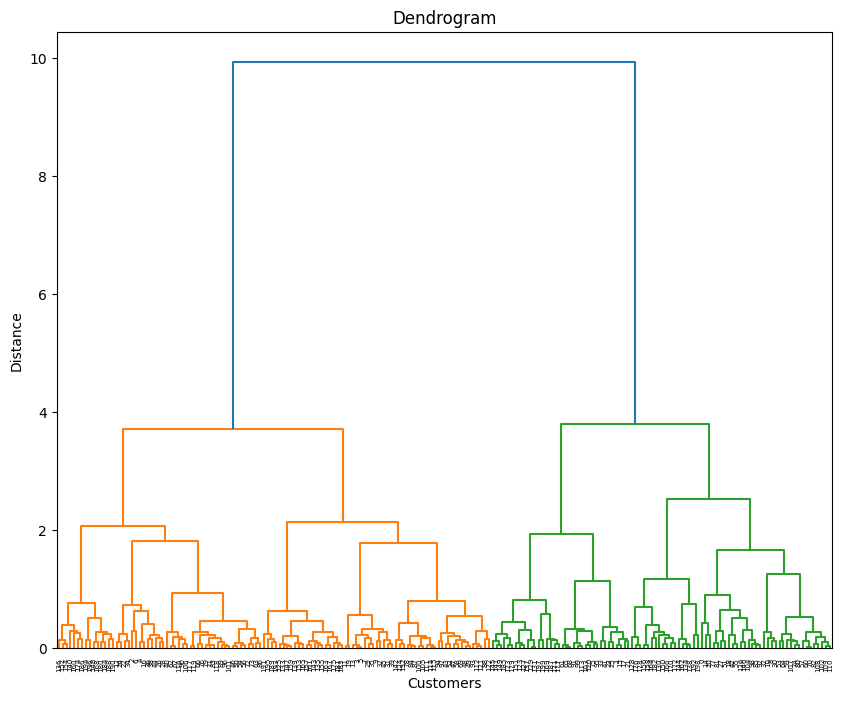

In [13]:
plt.figure(1, figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [14]:
# we can clearly select 4 to 6 clusters from this dendrogram, let's go for 4
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)
y_hc = hc.fit_predict(df)
y_hc

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [15]:
df["Class"] = pd.DataFrame(y_hc)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


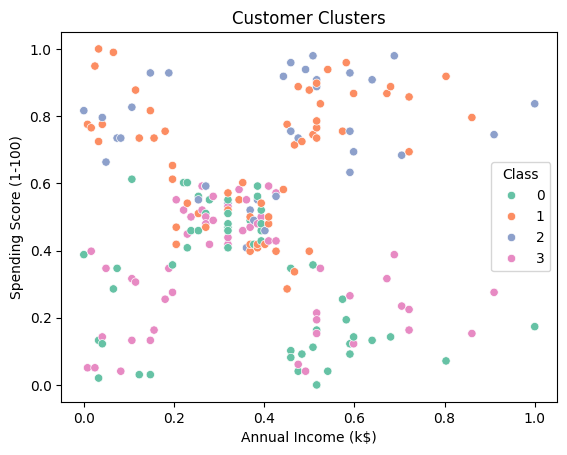

In [16]:
sns.scatterplot(data=df, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="Class", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [17]:
# it does not look good on the graph, maybe we cannot visualize it properly since we have 4 features
# maybe algorithm doesn't do a good job. let's try to see silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_hc))

0.7143503785893516


In [18]:
# i will try this with only income and spending score to see if we get a better score
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()
X.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [19]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X['cluster'] = y_hc
# we do not generally put y_hc column in X like this, i am only doing this to draw graphs
# it can corrupt the silhoutte score calculation but since we are comparing with each other
# it won't cause any disruptions in our case, at the end of this notebook i will calculate
# all scores without any noise like this one
X

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,0
196,0.909836,0.275510,2
197,0.909836,0.744898,0
198,1.000000,0.173469,2


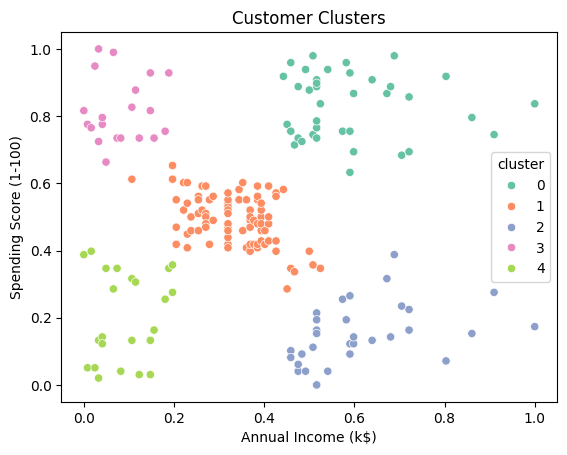

In [20]:
sns.scatterplot(data=X, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [21]:
print(silhouette_score(X, y_hc))

0.8508773413981672


In [22]:
# it seems like reducing the features increases the score, let's automate this and try from scratch
# you can also try the code below with different # of clusters so you can see the effect clearly
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [23]:
df = pd.read_csv("23-mall_customers.csv")
df = df.drop("CustomerID", axis = 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age","Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d,features_3d,features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)


    print(f"\n features :{feats}")
    print("Silhoutte score: ", sil)
    print("Davies Bouldin score: ", db)
    print("Calinski Harabasz score: ", ch)
    print("-------------")


 features :['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.5582698727196419
Davies Bouldin score:  0.5734519252471811
Calinski Harabasz score:  258.97400737720704
-------------

 features :['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.3955454334726547
Davies Bouldin score:  0.8746143334035464
Calinski Harabasz score:  123.99070840826577
-------------

 features :['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.35032447507156306
Davies Bouldin score:  1.0941951795238571
Calinski Harabasz score:  163.46602356383625
-------------


In [24]:
from sklearn.cluster import KMeans
df = pd.read_csv("23-mall_customers.csv")
df = df.drop("CustomerID", axis = 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age","Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d,features_3d,features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    kmeans = KMeans(n_clusters=5)
    y_hc = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)


    print(f"\n features :{feats}")
    print("Silhoutte score: ", sil)
    print("Davies Bouldin score: ", db)
    print("Calinski Harabasz score: ", ch)
    print("-------------")


 features :['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.5602436353739457
Davies Bouldin score:  0.5630236200163117
Calinski Harabasz score:  264.70156956422267
-------------

 features :['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.37358956496553747
Davies Bouldin score:  1.0781573346216926
Calinski Harabasz score:  120.01508296629966
-------------

 features :['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.3709126954677262
Davies Bouldin score:  1.0378449964320395
Calinski Harabasz score:  165.27791660059566
-------------
